- Bagging
    - 하나의 트레이닝 샘플로부터 여러개의 샘플을 만든다.
    - 각각의 샘플들을 학습
    - 각각의 예측결과가 도출, 그 값들을 평균낸다.

- Boosting
    - 하나의 트레이닝 모델이 있으면 그 모델을 학습시킨 결과로 예측값을 얻는다
    - 나온 예측값을 바탕으로 성능을 평가할 수 있다.(오차)
    - 오차가 점점 작아지는 방향으로 학습을 계속 진행
    - 오차를 바탕으로 기존의 특성값의 가중치를 재분배
    

# GBM (GradientBoosting)

- Boosting 알고리즘의 대표적인 모델
- 모델을 학습 - 예측하면서 오차(Residual)를 구할 수 있다.
- 도출된 오차를 기반으로 다시 기존 데이터의 weight를 수정(가중치 업데이트)하면서 재 학습한다.
- 오차를 줄이는 방법으로 진행되며 모델학습이 된다.
- Gradient Descent를 사용한다.
- Learning rate(학습률) 조정을 필요로 한다

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [4]:
# 모델 생성
# gbm = GradientBoostingClassifier(random_state=0)
# gbm = GradientBoostingClassifier(max_depth=2, random_state=0)
gbm = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
# 모델 학습
gbm.fit(X_train, y_train)

train_score = gbm.score(X_train, y_train)
print('학습 성능(accuracy) : ', train_score)
test_score = gbm.score(X_test, y_test)
print('테스트 성능(accuracy) : ',test_score)

학습 성능(accuracy) :  0.9929577464788732
테스트 성능(accuracy) :  0.951048951048951


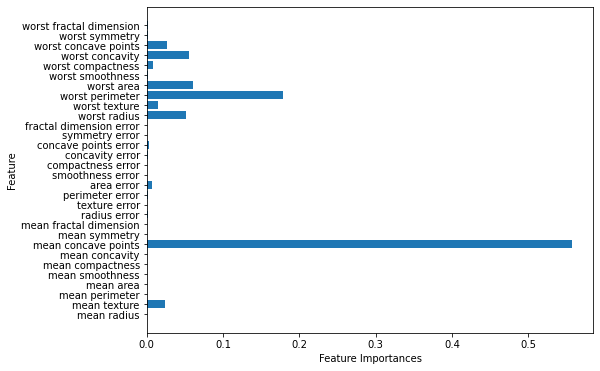

In [16]:
# 특성 중요도
def plot_feature_importances(model) :
    n_feature = cancer.data.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Feature')
    
plot_feature_importances(gbm)

## GridSearch Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
# Boosting 에서 가장 많이 사용하는 하이퍼 파라미터
# learning rate, max_depth, n_estimators...
param = {
    'n_estimators' : [100, 150, 200, 250],
    'max_depth' : [4,6,9,12],
    'learning_rate' : [10, 1, 0.1, 0.01, 0.001, 0.0001]
}

gmodel = GradientBoostingClassifier()
grid_search = GridSearchCV(gmodel, param_grid=param, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [4, 6, 9, 12],
                         'n_estimators': [100, 150, 200, 250]})

In [21]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=4, n_estimators=150)

In [20]:
grid_search.best_params_

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 150}

In [22]:
gmodel = GradientBoostingClassifier(max_depth=4, n_estimators=150, learning_rate=1)
gmodel.fit(X_train, y_train)
print(gmodel.score(X_train, y_train))
print(gmodel.score(X_test, y_test))

1.0
0.951048951048951
